# UM-Bridge with QMCPy

Using QMCPy to evaluate the [UM-Bridge Cantilever Beam Function](https://um-bridge-benchmarks.readthedocs.io/en/docs/forward-benchmarks/muq-beam-propagation.html) and approximate the expectation with respect to a uniform random variable. 

## Imports

In [1]:
import umbridge
import numpy as np
import qmcpy as qp
import time
from scipy.stats import qmc
from copy import deepcopy
import pickle  #write output to a file and load it back in

#import docker

#the module needs to be local if any changes have been made locally
#uncomment line below to make local qmcpy the import (only need to be done once per session and can be commented out
import sys
sys.path.insert(0, '../../../../..') #may need to be changed to find correct path to QMCSoftware folder

#prints paths available on local system
#for p in sys.path:
#    print(p)

#import qmcpy as qp #non local module import
from QMCSoftware import qmcpy as qp #local module import

## Start Docker Container

See the [UM-Bridge Documentation](https://um-bridge-benchmarks.readthedocs.io/en/docs/index.html) for image options. 

In [3]:
!docker run --name muqbp_new -it -d -p 4242:4242 linusseelinger/model-muq-beam:latest
#!docker run --name muqbp_new -d -p 4242:4242 my-build
#https://stackoverflow.com/questions/43099116/error-the-input-device-is-not-a-tty
#running locally

5253877e79a9b391fe0abdb93b7ec2eb0b51a389497ad8a59877f9ca408eb9e0


## Problem Setup

Initialize a QMCPy sampler and distribution.

In [4]:
d = 3 #this is the number of lumps
lb= 1
ub= 1.2
runs = 1

Initialize a UM-Bridge model and wrap it into a QMCPy compatible Integrand

In [5]:
model = umbridge.HTTPModel('http://localhost:4242', 'forward')
modeli = deepcopy(model) #and construct a model for just that deflection
output_dimension = 31
umbridge_config = {}
#DEBUG
print(umbridge_config)
print(model.get_input_sizes(umbridge_config))
print(model.get_output_sizes(umbridge_config))
#print(distribution.d)

def lump(t):
    tnp = np.array(t[0])
    tnewnp = np.ones(output_dimension)
    tnewnp[:len(tnp)] = tnp
    return [tnewnp.tolist()]


{}
[31]
[31]


## Model Evaluation

In [87]:
start_time = time.time()
x = sampler(16) # same as sampler.gen_samples(16)

print(x.shape) #prints (# of beams, input)

y = integrand_DigitalNet.f(x)
print(y.shape) #prints (# of beams, output)
print(type(y))
print(y.dtype)
print(y)

#time in seconds
end_time = time.time()
print(end_time - start_time)

(16, 31)
(16, 31)
<class 'numpy.ndarray'>
float64
[[    0.            46.98975085   182.05508529   397.83156536
    688.79584833  1052.49380192  1483.15937408  1975.01957768
   2523.71822969  3123.46083109  3771.05551711  4461.67782971
   5191.66273098  5956.40903367  6751.7601749   7574.90657812
   8422.08757696  9290.90654549 10177.73884734 11080.59080353
  11996.77895215 12923.86860323 13859.62262518 14802.19185296
  15750.09247835 16701.92027906 17656.43945593 18612.6502247
  19569.85233917 20527.48511842 21485.22622048]
 [    0.            45.88948198   178.2504701    392.73336588
    684.63380087  1048.25817775  1476.84149498  1965.51194126
   2510.38545764  3108.15184254  3752.75483781  4441.69135229
   5169.96740719  5932.68975958  6726.54456322  7547.99594809
   8394.31765993  9261.66024251 10147.36889121 11048.8323732
  11963.13600711 12888.42505442 13822.38592    14763.19468415
  15709.41316101 16659.48390654 17612.24082237 18566.73455145
  19522.17367684 20478.03618323 2143

In [89]:
start_time = time.time()
x = sampler(16) # same as sampler.gen_samples(16)

print(x.shape) #prints (# of beams, input)

y = integrand_Lattice.f(x)
print(y.shape) #prints (# of beams, output)
print(type(y))
print(y.dtype)
print(y)

#time in seconds
end_time = time.time()
print(end_time - start_time)

(16, 31)
(16, 31)
<class 'numpy.ndarray'>
float64
[[    0.            46.98975085   182.05508529   397.83156536
    688.79584833  1052.49380192  1483.15937408  1975.01957768
   2523.71822969  3123.46083109  3771.05551711  4461.67782971
   5191.66273098  5956.40903367  6751.7601749   7574.90657812
   8422.08757696  9290.90654549 10177.73884734 11080.59080353
  11996.77895215 12923.86860323 13859.62262518 14802.19185296
  15750.09247835 16701.92027906 17656.43945593 18612.6502247
  19569.85233917 20527.48511842 21485.22622048]
 [    0.            45.88948198   178.2504701    392.73336588
    684.63380087  1048.25817775  1476.84149498  1965.51194126
   2510.38545764  3108.15184254  3752.75483781  4441.69135229
   5169.96740719  5932.68975958  6726.54456322  7547.99594809
   8394.31765993  9261.66024251 10147.36889121 11048.8323732
  11963.13600711 12888.42505442 13822.38592    14763.19468415
  15709.41316101 16659.48390654 17612.24082237 18566.73455145
  19522.17367684 20478.03618323 2143

In [88]:
start_time = time.time()
x = sampler(16) # same as sampler.gen_samples(16)

print(x.shape) #prints (# of beams, input)

y = integrand_Halton.f(x)
print(y.shape) #prints (# of beams, output)
print(type(y))
print(y.dtype)
print(y)

#time in seconds
end_time = time.time()
print(end_time - start_time)

(16, 31)
(16, 31)
<class 'numpy.ndarray'>
float64
[[    0.            46.98975085   182.05508529   397.83156536
    688.79584833  1052.49380192  1483.15937408  1975.01957768
   2523.71822969  3123.46083109  3771.05551711  4461.67782971
   5191.66273098  5956.40903367  6751.7601749   7574.90657812
   8422.08757696  9290.90654549 10177.73884734 11080.59080353
  11996.77895215 12923.86860323 13859.62262518 14802.19185296
  15750.09247835 16701.92027906 17656.43945593 18612.6502247
  19569.85233917 20527.48511842 21485.22622048]
 [    0.            45.88948198   178.2504701    392.73336588
    684.63380087  1048.25817775  1476.84149498  1965.51194126
   2510.38545764  3108.15184254  3752.75483781  4441.69135229
   5169.96740719  5932.68975958  6726.54456322  7547.99594809
   8394.31765993  9261.66024251 10147.36889121 11048.8323732
  11963.13600711 12888.42505442 13822.38592    14763.19468415
  15709.41316101 16659.48390654 17612.24082237 18566.73455145
  19522.17367684 20478.03618323 2143

## Automatically Approximate the Expectation

In [7]:
figpath = '/Users/irenecaracioni/QMCSoftware/demos/talk_paper_demos/SURE_2023_Demos/test_data'

In [34]:
# DigitalNet-NetG
times_DN_N ={} 
n_DN_N = {}
sol_DN_N = {}
lowb_DN_N = {}
upb_DN_N = {}

errorfun = lambda s,abs_tols,rel_tols: np.maximum(0.001, np.minimum(abs_tols,np.abs(s)*rel_tols))

for j in [100]:
    times_DN_N[j]=np.zeros(runs)
    n_DN_N[j] = np.empty([runs, output_dimension])
    sol_DN_N[j] = np.empty([runs, output_dimension])
    lowb_DN_N[j] = np.empty([runs, output_dimension])
    upb_DN_N[j] = np.empty([runs, output_dimension])
    for i in range(runs):
        start_time = time.time()
        integrand_DigitalNet = qp.UMBridgeWrapper(qp.Uniform(qp.DigitalNetB2(d),lb,ub), model, umbridge_config, parallel=False, tf_input_to_umbridge_input = lump) # INTEGRAND
        qmc_stop_crit = qp.CubQMCNetG(integrand_DigitalNet,abs_tol=.1, rel_tol=1e-5, error_fun=errorfun) # QMC STOPPING CRITERION
        solution,data = qmc_stop_crit.integrate()
        end_time = time.time()
        
        times_DN_N[j][i]= end_time - start_time
        n_DN_N[j][i] = data.n
        sol_DN_N[j][i] = data.solution
        lowb_DN_N[j][i] = data.comb_bound_low
        upb_DN_N[j][i]= data.comb_bound_high
        
print(lowb_DN_N)
print(upb_DN_N)
print(times_DN_N)
print(sol_DN_N)
print(n_DN_N)

{100: array([[    0.        ,    45.03643652,   176.16457304,   388.77264021,
          684.94260959,  1058.62230208,  1503.98086004,  2015.40799078,
         2587.51405105,  3215.12852595,  3893.29919724,  4617.25603037,
         5382.5609579 ,  6184.89529739,  7020.2024593 ,  7884.65667347,
         8774.66594848,  9686.87639689, 10618.17464145, 11565.68899193,
        12526.78919207, 13499.08515526, 14480.42437863, 15468.88962088,
        16462.88089688, 17460.77808728, 18461.43666988, 19463.85775055,
        20467.26736525, 21471.11469225, 22475.07098023]])}
{100: array([[    0.        ,    45.03746449,   176.16692459,   388.77639481,
          684.94777614,  1058.62888076,  1503.98885083,  2015.41739427,
         2587.52486745,  3215.14075526,  3893.31283946,  4617.34666202,
         5382.66034678,  6185.00344349,  7020.31933336,  7884.78214967,
         8774.80002681,  9687.01907736, 10618.32592406, 11565.84887667,
        12526.95767896, 13499.26224428, 14480.61006979, 15469.083

In [17]:
errorfun = lambda s,abs_tols,rel_tols: np.minimum(abs_tols,np.abs(s)*rel_tols)
errorfun([1, 2],.01,.1)
errorfun([1,2], 0.1, 0.005)

array([0.005, 0.01 ])

In [15]:
times_DN_N

{100: array([8.04219007])}

In [9]:
# DigitalNet-CLT
times_DN_CLT ={} 
n_DN_CLT = {}
sol_DN_CLT = {}
lowb_DN_CLT = {}
upb_DN_CLT = {}

for j in [0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 1, 2, 3,6,15,30]:
    times_DN_CLT[j]=np.zeros(runs)
    n_DN_CLT[j] = np.empty([runs, output_dimension])
    sol_DN_CLT[j] = np.empty([runs, output_dimension])
    lowb_DN_CLT[j] = np.empty([runs, output_dimension])
    upb_DN_CLT[j] = np.empty([runs, output_dimension])
    for i in range(runs):
        start_time = time.time()
        integrand_DigitalNet = qp.UMBridgeWrapper(qp.Uniform(qp.DigitalNetB2(d),lb,ub), model, umbridge_config, parallel=False, tf_input_to_umbridge_input = lump) # INTEGRAND
        qmc_stop_crit = qp.CubQMCCLT(integrand_DigitalNet,abs_tol=j) # CLT for QMC STOPPING CRITERION
        solution,data = qmc_stop_crit.integrate()
        end_time = time.time()
        
        times_DN_CLT[j][i]= end_time - start_time
        n_DN_CLT[j][i] = data.n
        sol_DN_CLT[j][i] = data.solution
        lowb_DN_CLT[j][i] = data.comb_bound_low
        upb_DN_CLT[j][i]= data.comb_bound_high

In [10]:
with open(figpath+'data1.pkl','wb') as myfile:pickle.dump([times_DN_N,n_DN_N,sol_DN_N,lowb_DN_N,upb_DN_N,times_DN_CLT, n_DN_CLT, sol_DN_CLT, lowb_DN_CLT, upb_DN_CLT],myfile)

In [8]:
with open(figpath+'data1.pkl','rb') as myfile: [times_DN_N,n_DN_N,sol_DN_N,lowb_DN_N,upb_DN_N,times_DN_CLT, n_DN_CLT, sol_DN_CLT, lowb_DN_CLT, upb_DN_CLT] = pickle.load(myfile)

In [10]:
# Lattice - Lattice
times_L_L ={} 
n_L_L = {}
sol_L_L = {}
lowb_L_L = {}
upb_L_L = {}

for j in [0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 1, 2, 3,6,15,30]:
    times_L_L[j]=np.zeros(runs)
    n_L_L[j] = np.empty([runs, output_dimension])
    sol_L_L[j] = np.empty([runs, output_dimension])
    lowb_L_L[j] = np.empty([runs, output_dimension])
    upb_L_L[j] = np.empty([runs, output_dimension])
    for i in range(runs):
        start_time = time.time()
        integrand_Lattice = qp.UMBridgeWrapper(qp.Uniform(qp.Lattice(d),lb,ub), model, umbridge_config, parallel=False, tf_input_to_umbridge_input = lump)
        qmc_stop_crit = qp.CubQMCLatticeG(integrand_Lattice,abs_tol=j) # QMC STOPPING CRITERION
        solution,data = qmc_stop_crit.integrate()
        end_time = time.time()
        
        times_L_L[j][i]= end_time - start_time
        n_L_L[j][i] = data.n
        sol_L_L[j][i] = data.solution
        lowb_L_L[j][i] = data.comb_bound_low
        upb_L_L[j][i]= data.comb_bound_high

In [13]:
with open(figpath+'data2.pkl','wb') as myfile:pickle.dump([times_L_L, n_L_L, sol_L_L, lowb_L_L, upb_L_L],myfile)

In [ ]:
# Lattice - CLT
times_L_CLT ={} 
n_L_CLT = {}
sol_L_CLT = {}
lowb_L_CLT = {}
upb_L_CLT = {}

for j in [0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 1, 2, 3,6,15,30]:
    times_L_CLT[j]=np.zeros(runs)
    n_L_CLT[j] = np.empty([runs, output_dimension])
    sol_L_CLT[j] = np.empty([runs, output_dimension])
    lowb_L_CLT[j] = np.empty([runs, output_dimension])
    upb_L_CLT[j] = np.empty([runs, output_dimension])
    
    for i in range(runs):
        start_time = time.time()
        integrand_Lattice = qp.UMBridgeWrapper(qp.Uniform(qp.Lattice(d),lb,ub), model, umbridge_config, parallel=False, tf_input_to_umbridge_input = lump)
        qmc_stop_crit = qp.CubQMCCLT(integrand_Lattice,abs_tol=j) # QMC STOPPING CRITERION
        solution,data = qmc_stop_crit.integrate()
        end_time = time.time()

        times_L_CLT[j][i]= end_time - start_time
        n_L_CLT[j][i] = data.n
        sol_L_CLT[j][i] = data.solution
        lowb_L_CLT[j][i] = data.comb_bound_low
        upb_L_CLT[j][i]= data.comb_bound_high

In [ ]:
# Halton-CLT

times_H_CLT ={} 
n_H_CLT = {}
sol_H_CLT = {}
lowb_H_CLT = {}
upb_H_CLT = {}

for j in [0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 1, 2, 3,6,15,30]:
    sampler_Halton=qp.Halton(d) # DISCRETE DISTRIBUTION, default = 3
    distribution_Halton = qp.Uniform(sampler_Halton,lb,ub) # TRUE MEASURE
    integrand_Halton= qp.UMBridgeWrapper(distribution_Halton, model, umbridge_config, parallel=False, tf_input_to_umbridge_input = lump) # INTEGRAND

    times_H_CLT[j]=np.zeros(runs)
    n_H_CLT[j] = np.empty([runs, output_dimension])
    sol_H_CLT[j] = np.empty([runs, output_dimension])
    lowb_H_CLT[j] = np.empty([runs, output_dimension])
    upb_H_CLT[j] = np.empty([runs, output_dimension])
    

    for i in range(runs):
        start_time = time.time()
        qmc_stop_crit = qp.CubQMCCLT(integrand_Halton,abs_tol=j) # QMC STOPPING CRITERION
        solution,data = qmc_stop_crit.integrate()
        end_time = time.time()
        
        times_H_CLT[j][i]= end_time - start_time
        n_H_CLT[j][i] = data.n
        sol_H_CLT[j][i] = data.solution
        lowb_H_CLT[j][i] = data.comb_bound_low
        upb_H_CLT[j][i]= data.comb_bound_high    

In [10]:
# IID-MC
times_IID_MC ={} 
n_IID_MC = {}
sol_IID_MC = {}
lowb_IID_MC = {}
upb_IID_MC = {}

for j in [2000]:
    times_IID_MC[j]=np.zeros(runs)
    n_IID_MC[j] = np.empty([runs, output_dimension])
    sol_IID_MC[j] = np.empty([runs, output_dimension])
    lowb_IID_MC[j] = np.empty([runs, output_dimension])
    upb_IID_MC[j] = np.empty([runs, output_dimension])
    for i in range(runs):
        start_time = time.time()
        integrand_IID = qp.UMBridgeWrapper(qp.Uniform(qp.IIDStdUniform(d),lb,ub), model, umbridge_config, parallel=False, tf_input_to_umbridge_input = lump) # INTEGRAND
        mc_stop_crit = qp.CubMCCLT(integrand_IID,abs_tol=j) # MC Stopping Criterion : iid sampler is simple montecarlo
        solution,data = mc_stop_crit.integrate()
        end_time = time.time()
        
data
        times_IID_MC[j][i]= end_time - start_time
        n_IID_MC[j][i] = data.n
        sol_IID_MC[j][i] = data.solution
        lowb_IID_MC[j][i] = data.comb_bound_low
        upb_IID_MC[j][i]= data.comb_bound_high

MeanVarData (AccumulateData Object)
    solution        9019.442
    error_bound     695.452
    n_total         3072
    n               2^(11)
    levels          1
    time_integrate  23.707
CubMCCLT (StoppingCriterion Object)
    abs_tol         2000
    rel_tol         0
    n_init          2^(10)
    n_max           10000000000
    inflate         1.200
    alpha           0.010
UMBridgeWrapper (Integrand Object)
Uniform (TrueMeasure Object)
    lower_bound     1
    upper_bound     1.200
IIDStdUniform (DiscreteDistribution Object)
    d               3
    entropy         219644151205233713506290961521972695349
    spawn_key       ()

In [ ]:


CubMCG #may be the case that this one doesn't work, so ignore




In [ ]:
with open(figpath+'irenedata.pkl','rb') as myfile: [times_DN_N,n_DN_N,sol_DN_N,lowb_DN_N,upb_DN_N,times_DN_CLT, n_DN_CLT, sol_DN_CLT, lowb_DN_CLT, upb_DN_CLT, times_L_L, n_L_L, sol_L_L, lowb_L_L, upb_L_L, times_L_CLT, n_L_CLT, sol_L_CLT, lowb_L_CLT, upb_L_CLT, times_H_CLT, n_H_CLT, sol_H_CLT, lowb_H_CLT, upb_H_CLT] = pickle.load(myfile)

In [45]:
print(times_DN_N)

{15: array([6.08709407, 5.81152701, 5.89558816, 6.27336097]), 30: array([5.38130784, 5.711447  , 6.414464  , 6.1832819 ])}


In [46]:
print(times_DN_N[30])

[5.38130784 5.711447   6.414464   6.1832819 ]


In [51]:
print(sol_DN_N)

{15: array([[    0.        ,    45.03695127,   176.16575009,   388.7745193 ,
          684.94519516,  1058.62559423,  1503.98485876,  2015.41269636,
         2587.51946359,  3215.13464545,  3893.30602371,  4617.30136242,
         5382.61067002,  6184.94938957,  7020.26091691,  7884.7194336 ,
         8774.73301113,  9686.94776206, 10618.25030914, 11565.76896214,
        12526.8734648 , 13499.17373051, 14480.5172564 , 15468.98680117,
        16462.89764429, 17460.79554403, 18461.45483596, 19463.87662597,
        20467.28695001, 21471.13498634, 22475.09198365],
       [    0.        ,    45.0369857 ,   176.16581917,   388.77462301,
          684.94533352,  1058.62576723,  1503.98506639,  2015.41293863,
         2587.5197405 ,  3215.13495701,  3893.30636991,  4617.30174326,
         5382.6110855 ,  6184.94983969,  7020.26140167,  7884.719953  ,
         8774.73356517,  9686.94835074, 10618.25093247, 11565.7696201 ,
        12526.87415741, 13499.17445775, 14480.51801829, 15468.98759769,
  

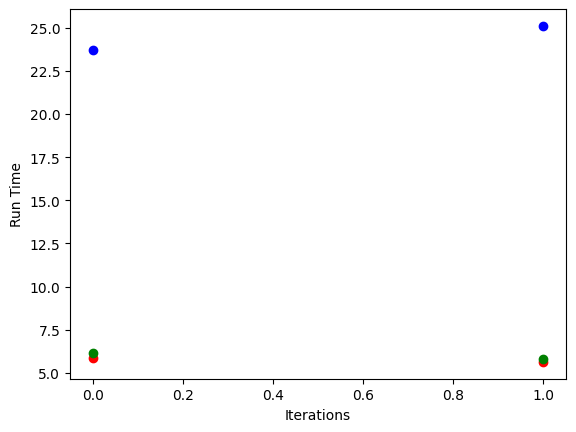

In [34]:
from matplotlib import pyplot as plt
import numpy as np

x = np.arange(runs)

plt.scatter(x, times_DN_N, color='r')
plt.scatter(x, times_DN_CLT, color="blue")
plt.scatter(x, times_L_L, color="g")

plt.xlabel("Iterations")
plt.ylabel("Run Time")
plt.show()

Text(0.5, 0, 'Run Time')

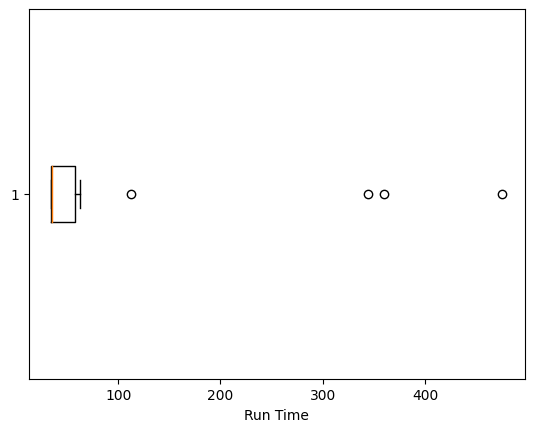

In [145]:
plt.boxplot(y2, ver)
plt.xlabel("Run Time")

Text(0.5, 0, 'Run Time')

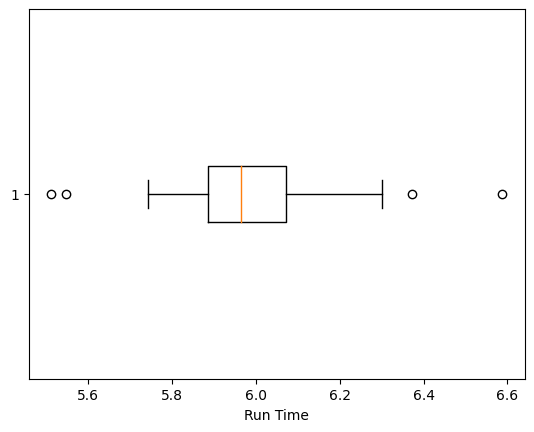

In [146]:
plt.boxplot(y3, vert=False)
plt.xlabel("Run Time")

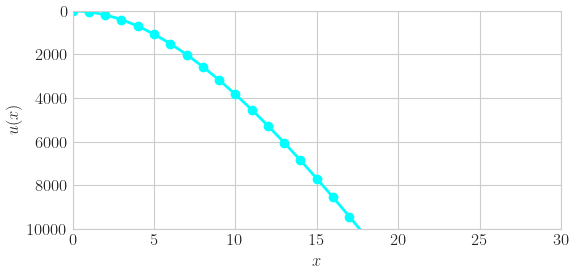

In [37]:
from matplotlib import pyplot
pyplot.style.use('../../../../qmcpy.mplstyle') #may need to be changed to find path to document in QMCSoftware folder
fig,ax = pyplot.subplots(figsize=(6,3))
ax.plot(solution,'-o')
ax.set_xlim([0,len(solution)-1]); ax.set_xlabel(r'$x$')
ax.set_ylim([10000,-10]);  ax.set_ylabel(r'$u(x)$');

## Parallel Evaluation

QMCPy can automatically multi-threaded requests to the model by setting `parallel=p` where `p` is the number of processors used by [multiprocessing.pool.ThreadPool](https://docs.python.org/3/library/multiprocessing.html#multiprocessing.pool.ThreadPool). Setting `parallel=True` is equivalent to setting `paralle=os.cpu_count()`.

In [10]:
import os
print('Available CPUs: %d'%os.cpu_count())

Available CPUs: 8


In [11]:
integrand = qp.UMBridgeWrapper(distribution,model,umbridge_config,parallel=8)
solution,data = qp.CubQMCNetG(integrand,abs_tol=10).integrate()
data

LDTransformData (AccumulateData Object)
    solution        [    0.       47.403   183.785 ... 19837.438 20807.061 21776.79 ]
    comb_bound_low  [    0.       47.393   183.746 ... 19834.606 20804.111 21773.722]
    comb_bound_high [    0.       47.413   183.824 ... 19840.269 20810.01  21779.858]
    comb_flags      [ True  True  True ...  True  True  True]
    n_total         2^(10)
    n               [1024. 1024. 1024. ... 1024. 1024. 1024.]
    time_integrate  2.683
CubQMCNetG (StoppingCriterion Object)
    abs_tol         10
    rel_tol         0
    n_init          2^(10)
    n_max           2^(35)
UMBridgeWrapper (Integrand Object)
Uniform (TrueMeasure Object)
    lower_bound     1
    upper_bound     1.050
DigitalNetB2 (DiscreteDistribution Object)
    d               31
    dvec            [ 0  1  2 ... 28 29 30]
    randomize       LMS_DS
    graycode        0
    entropy         7
    spawn_key       ()

## Shut Down Docker Image

In [12]:
!docker rm -f muqbp_new

muqbp_new
